In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import numpy.random as random

In [2]:
%matplotlib inline

In [3]:
num_sims    = 150
num_trials  = 1000
rand_nums   = random.random_sample((num_sims,num_trials))
wealth      = np.zeros((num_sims,num_trials+1))
wealth[:,0] = 1
for i in range(num_sims):
    for j in range(num_trials):
        if rand_nums[i,j] < 0.5:
            wealth[i,j+1] = wealth[i,j] + 0.5*wealth[i,j]
        if rand_nums[i,j] > 0.5:
            wealth[i,j+1] = wealth[i,j] - 0.4*wealth[i,j]

In [28]:
expected_wealth    = np.zeros((num_trials+1,))
heuristic_loss     = np.zeros((num_trials+1,))
expected_wealth[0] = 1
heuristic_loss[0]  = 1
for i in range(num_trials):
    expected_wealth[i+1] = 1.05*expected_wealth[i]
    heuristic_loss[i+1]  = 0.9*heuristic_loss[i]
ensemble_wealth = np.mean(wealth,axis=0)
print ensemble_wealth.shape

(1001,)


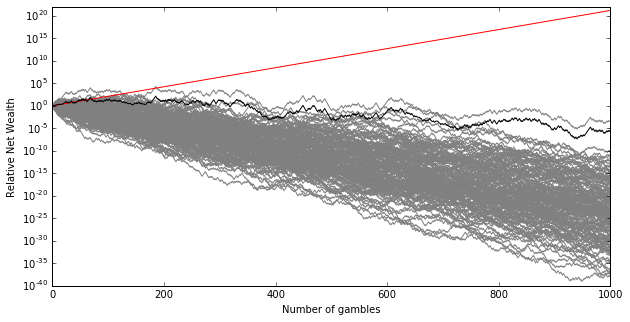

In [33]:
fig = plt.figure(figsize=(10,5))
ax  = fig.add_subplot(1,1,1)
for i in range(num_sims):
    ax.semilogy(wealth[i,:],color='grey', linestyle='-')
ax.semilogy(expected_wealth,color='red',  linestyle='-')
ax.semilogy(ensemble_wealth,color='black',linestyle='-')
#ax.semilogy(heuristic_loss,color='red',linestyle='-')
ax.set_xlabel('Number of gambles')
ax.set_ylabel('Relative Net Wealth')
#ax.set_ylim([1e-10,1e20])

In [34]:
fig.savefig('c:/Users/Conrad/Documents/GitHub/BlogWyrm/Posts/2020/Feb/Common Cents/Peters_Wager_Simulation_raw.png')

In [9]:
num_gamblers = 10000
e_wealth     = np.ones((num_gamblers,))

In [11]:
for gambler in range(num_gamblers):
    rand_num = np.random.random_sample(1)[0]
    if rand_num < 0.5:
        e_wealth[gambler] = 1.5*e_wealth[gambler]
    if rand_num > 0.5:
        e_wealth[gambler] = 0.6*e_wealth[gambler]

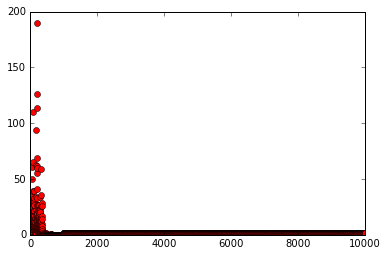

In [12]:
plt.plot(e_wealth,'ro')

In [13]:
np.mean(e_wealth)

1.3553174987084955

In [14]:
num_bins  = 10
bin_size  = num_gamblers/num_bins
bin_array = np.zeros((num_bins,))
for i in range(num_bins):
    bin_array[i] = np.mean(e_wealth[i*bin_size:(i+1)*bin_size])

In [15]:
bin_array

array([ 4.13887498,  1.03410001,  1.0482    ,  1.0383    ,  1.0518    ,
        1.0428    ,  1.0581    ,  1.0482    ,  1.0338    ,  1.059     ])

In [16]:
def ten_gamblers(last_wealth=None):
    import numpy as np
    
    num_gamblers   = 100
    win_payoff     = 1.5
    loss_payoff    = 0.6
    if type(last_wealth) != np.ndarray:
        wealth     = np.ones(num_gamblers)
    else:
        wealth     = last_wealth 
    outcome        = []
    for n in range(num_gamblers):
        rand_num = np.random.rand()
        if rand_num > 0.5:
            wealth[n] = wealth[n]*win_payoff
            outcome.append('win')
        if rand_num < 0.5:
            wealth[n] = wealth[n]*loss_payoff
            outcome.append('loss')
            
    return wealth, outcome        

In [17]:
wealth_1, outcome = ten_gamblers()
print wealth_1
print outcome
print np.mean(wealth_1)

[ 0.6  1.5  0.6  1.5  1.5  0.6  0.6  1.5  0.6  0.6  1.5  1.5  0.6  0.6  0.6
  1.5  0.6  1.5  0.6  1.5  1.5  1.5  0.6  1.5  0.6  1.5  0.6  0.6  0.6  0.6
  0.6  1.5  0.6  1.5  0.6  1.5  0.6  0.6  0.6  1.5  0.6  1.5  0.6  1.5  1.5
  1.5  0.6  0.6  0.6  1.5  1.5  1.5  1.5  1.5  0.6  0.6  0.6  0.6  1.5  0.6
  1.5  0.6  0.6  0.6  1.5  1.5  1.5  0.6  0.6  0.6  0.6  0.6  1.5  1.5  1.5
  1.5  0.6  1.5  1.5  1.5  1.5  1.5  0.6  0.6  1.5  1.5  1.5  1.5  1.5  1.5
  1.5  0.6  0.6  1.5  1.5  1.5  1.5  0.6  1.5  0.6]
['loss', 'win', 'loss', 'win', 'win', 'loss', 'loss', 'win', 'loss', 'loss', 'win', 'win', 'loss', 'loss', 'loss', 'win', 'loss', 'win', 'loss', 'win', 'win', 'win', 'loss', 'win', 'loss', 'win', 'loss', 'loss', 'loss', 'loss', 'loss', 'win', 'loss', 'win', 'loss', 'win', 'loss', 'loss', 'loss', 'win', 'loss', 'win', 'loss', 'win', 'win', 'win', 'loss', 'loss', 'loss', 'win', 'win', 'win', 'win', 'win', 'loss', 'loss', 'loss', 'loss', 'win', 'loss', 'win', 'loss', 'loss', 'loss', 'win', 

In [18]:
wealth_2, outcome = ten_gamblers(wealth_1)
print wealth_2
print outcome
print np.mean(wealth_2)

[ 0.9   2.25  0.9   2.25  0.9   0.9   0.36  0.9   0.9   0.36  2.25  0.9
  0.9   0.9   0.36  0.9   0.9   0.9   0.36  2.25  0.9   0.9   0.36  0.9
  0.9   2.25  0.9   0.9   0.9   0.9   0.9   0.9   0.36  0.9   0.9   0.9
  0.9   0.9   0.36  2.25  0.9   2.25  0.9   0.9   0.9   2.25  0.9   0.36
  0.9   0.9   2.25  2.25  0.9   2.25  0.9   0.36  0.9   0.36  0.9   0.9
  2.25  0.36  0.9   0.9   0.9   2.25  2.25  0.36  0.36  0.9   0.36  0.36
  2.25  2.25  0.9   0.9   0.36  2.25  2.25  2.25  2.25  2.25  0.9   0.9
  2.25  0.9   2.25  2.25  0.9   2.25  0.9   0.9   0.9   2.25  2.25  0.9
  0.9   0.36  0.9   0.9 ]
['win', 'win', 'win', 'win', 'loss', 'win', 'loss', 'loss', 'win', 'loss', 'win', 'loss', 'win', 'win', 'loss', 'loss', 'win', 'loss', 'loss', 'win', 'loss', 'loss', 'loss', 'loss', 'win', 'win', 'win', 'win', 'win', 'win', 'win', 'loss', 'loss', 'loss', 'win', 'loss', 'win', 'win', 'loss', 'win', 'win', 'win', 'win', 'loss', 'loss', 'win', 'win', 'loss', 'win', 'loss', 'win', 'win', 'loss', '

In [19]:
wealth_3, outcome = ten_gamblers(wealth_2)
print wealth_3
print outcome
print np.mean(wealth_3)

[ 0.54   3.375  1.35   3.375  1.35   0.54   0.54   1.35   1.35   0.54
  3.375  0.54   1.35   1.35   0.54   1.35   1.35   0.54   0.54   1.35   0.54
  1.35   0.216  1.35   0.54   1.35   0.54   0.54   1.35   1.35   0.54   1.35
  0.216  0.54   1.35   1.35   0.54   0.54   0.216  1.35   0.54   3.375
  0.54   0.54   0.54   3.375  1.35   0.216  1.35   0.54   3.375  3.375
  1.35   3.375  1.35   0.54   0.54   0.54   0.54   1.35   3.375  0.54   0.54
  1.35   1.35   1.35   1.35   0.216  0.216  0.54   0.54   0.216  1.35
  3.375  1.35   0.54   0.216  3.375  1.35   1.35   1.35   3.375  1.35   0.54
  3.375  0.54   1.35   1.35   1.35   3.375  1.35   0.54   0.54   3.375
  3.375  0.54   0.54   0.216  1.35   1.35 ]
['loss', 'win', 'win', 'win', 'win', 'loss', 'win', 'win', 'win', 'win', 'win', 'loss', 'win', 'win', 'win', 'win', 'win', 'loss', 'win', 'loss', 'loss', 'win', 'loss', 'win', 'loss', 'loss', 'loss', 'loss', 'win', 'win', 'loss', 'win', 'loss', 'loss', 'win', 'win', 'loss', 'loss', 'loss', 'los

In [20]:
wealth_4, outcome = ten_gamblers(wealth_3)
print wealth_4
print outcome
print np.mean(wealth_4)

[ 0.324   5.0625  0.81    5.0625  2.025   0.324   0.81    0.81    2.025
  0.81    2.025   0.324   0.81    2.025   0.324   0.81    0.81    0.81
  0.81    2.025   0.81    2.025   0.1296  0.81    0.81    0.81    0.81
  0.81    2.025   0.81    0.81    0.81    0.324   0.81    0.81    2.025
  0.81    0.81    0.324   2.025   0.324   2.025   0.81    0.81    0.324
  5.0625  2.025   0.1296  0.81    0.324   2.025   2.025   0.81    5.0625
  0.81    0.324   0.324   0.81    0.324   0.81    5.0625  0.324   0.324
  0.81    0.81    0.81    2.025   0.1296  0.1296  0.324   0.81    0.324
  2.025   2.025   0.81    0.324   0.324   5.0625  0.81    0.81    2.025
  5.0625  2.025   0.81    2.025   0.81    0.81    2.025   0.81    5.0625
  0.81    0.324   0.81    5.0625  5.0625  0.324   0.324   0.1296  0.81
  2.025 ]
['loss', 'win', 'loss', 'win', 'win', 'loss', 'win', 'loss', 'win', 'win', 'loss', 'loss', 'loss', 'win', 'loss', 'loss', 'loss', 'win', 'win', 'win', 'win', 'win', 'loss', 'loss', 'win', 'loss', 'wi

In [21]:
wealth_5, outcome = ten_gamblers(wealth_4)
print wealth_5
print outcome
print np.mean(wealth_5)

[ 0.486    7.59375  0.486    3.0375   3.0375   0.1944   1.215    1.215
  3.0375   0.486    3.0375   0.1944   0.486    3.0375   0.1944   0.486
  1.215    1.215    1.215    3.0375   0.486    3.0375   0.1944   1.215
  1.215    0.486    1.215    1.215    1.215    0.486    1.215    1.215
  0.1944   0.486    0.486    3.0375   1.215    1.215    0.486    1.215
  0.1944   3.0375   1.215    0.486    0.1944   3.0375   3.0375   0.1944
  0.486    0.486    3.0375   3.0375   1.215    7.59375  0.486    0.1944
  0.486    1.215    0.486    0.486    3.0375   0.1944   0.486    1.215
  0.486    1.215    1.215    0.1944   0.1944   0.486    1.215    0.1944
  3.0375   1.215    1.215    0.486    0.1944   7.59375  0.486    1.215
  1.215    3.0375   3.0375   1.215    3.0375   0.486    0.486    1.215
  1.215    3.0375   1.215    0.486    0.486    7.59375  3.0375   0.486
  0.486    0.07776  1.215    3.0375 ]
['win', 'win', 'loss', 'loss', 'win', 'loss', 'win', 'win', 'win', 'loss', 'win', 'loss', 'loss', 'win', 'l

In [22]:
wealth_6, outcome = ten_gamblers(wealth_5)
print wealth_6
print outcome
print np.mean(wealth_6)

[  0.729     11.390625   0.729      4.55625    1.8225     0.2916     0.729
   0.729      1.8225     0.2916     1.8225     0.2916     0.729      1.8225
   0.11664    0.2916     1.8225     1.8225     0.729      1.8225     0.2916
   4.55625    0.11664    1.8225     0.729      0.2916     0.729      0.729
   1.8225     0.2916     0.729      0.729      0.11664    0.2916     0.729
   4.55625    0.729      1.8225     0.2916     1.8225     0.2916     4.55625
   0.729      0.729      0.11664    4.55625    4.55625    0.11664    0.729
   0.729      4.55625    4.55625    1.8225    11.390625   0.2916     0.11664
   0.2916     0.729      0.2916     0.729      1.8225     0.11664    0.729
   1.8225     0.729      0.729      0.729      0.11664    0.2916     0.2916
   1.8225     0.11664    1.8225     1.8225     1.8225     0.729      0.2916
  11.390625   0.2916     1.8225     0.729      4.55625    1.8225     0.729
   1.8225     0.729      0.2916     1.8225     0.729      1.8225     1.8225
   0.729      0.

In [23]:
wealth_7, outcome = ten_gamblers(wealth_6)
print wealth_7
print outcome
print np.mean(wealth_7)

[  0.4374     17.0859375   1.0935      2.73375     2.73375     0.17496
   0.4374      1.0935      1.0935      0.4374      2.73375     0.4374
   0.4374      1.0935      0.069984    0.4374      2.73375     1.0935
   0.4374      2.73375     0.4374      6.834375    0.17496     1.0935
   0.4374      0.17496     1.0935      1.0935      2.73375     0.17496
   1.0935      0.4374      0.17496     0.4374      1.0935      6.834375
   1.0935      1.0935      0.4374      2.73375     0.17496     6.834375
   1.0935      0.4374      0.17496     6.834375    6.834375    0.069984
   0.4374      1.0935      2.73375     6.834375    1.0935      6.834375
   0.17496     0.17496     0.4374      1.0935      0.17496     0.4374
   1.0935      0.17496     0.4374      1.0935      0.4374      0.4374
   0.4374      0.17496     0.4374      0.17496     2.73375     0.17496
   2.73375     2.73375     2.73375     0.4374      0.17496     6.834375
   0.4374      2.73375     0.4374      6.834375    2.73375     1.0935
   2.73

In [24]:
wealth_8, outcome = ten_gamblers(wealth_7)
print wealth_8
print outcome
print np.mean(wealth_8)

[  0.26244    10.2515625   1.64025     1.64025     4.100625    0.104976
   0.6561      0.6561      1.64025     0.26244     1.64025     0.26244
   0.26244     1.64025     0.0419904   0.26244     1.64025     1.64025
   0.26244     1.64025     0.26244    10.2515625   0.26244     0.6561
   0.6561      0.26244     0.6561      0.6561      4.100625    0.104976
   1.64025     0.6561      0.104976    0.26244     0.6561     10.2515625
   1.64025     0.6561      0.26244     1.64025     0.104976    4.100625
   0.6561      0.26244     0.104976    4.100625   10.2515625   0.0419904
   0.26244     0.6561      4.100625   10.2515625   1.64025     4.100625
   0.104976    0.104976    0.6561      1.64025     0.26244     0.26244
   0.6561      0.104976    0.6561      0.6561      0.6561      0.26244
   0.26244     0.26244     0.26244     0.104976    4.100625    0.104976
   1.64025     1.64025     1.64025     0.26244     0.26244    10.2515625
   0.6561      1.64025     0.26244     4.100625    4.100625    0.65

In [25]:
wealth_9, outcome = ten_gamblers(wealth_8)
print wealth_9
print outcome
print np.mean(wealth_9)

[  0.39366     15.37734375   2.460375     0.98415      2.460375     0.0629856
   0.39366      0.98415      0.98415      0.39366      2.460375     0.39366
   0.157464     0.98415      0.0629856    0.39366      2.460375     0.98415
   0.157464     0.98415      0.157464     6.1509375    0.39366      0.39366
   0.98415      0.39366      0.98415      0.39366      6.1509375    0.157464
   0.98415      0.98415      0.0629856    0.39366      0.39366     15.37734375
   2.460375     0.39366      0.157464     2.460375     0.157464     6.1509375
   0.98415      0.157464     0.0629856    2.460375    15.37734375
   0.0629856    0.157464     0.98415      6.1509375   15.37734375   0.98415
   6.1509375    0.157464     0.157464     0.98415      0.98415      0.157464
   0.157464     0.98415      0.157464     0.98415      0.98415      0.98415
   0.157464     0.39366      0.157464     0.39366      0.0629856
   6.1509375    0.157464     2.460375     0.98415      2.460375     0.157464
   0.39366     15.37734

In [26]:
wealth_10, outcome = ten_gamblers(wealth_9)
print wealth_10
print outcome
print np.mean(wealth_10)

[  2.36196000e-01   9.22640625e+00   1.47622500e+00   5.90490000e-01
   3.69056250e+00   9.44784000e-02   2.36196000e-01   1.47622500e+00
   5.90490000e-01   2.36196000e-01   1.47622500e+00   2.36196000e-01
   2.36196000e-01   1.47622500e+00   9.44784000e-02   5.90490000e-01
   1.47622500e+00   1.47622500e+00   2.36196000e-01   1.47622500e+00
   2.36196000e-01   3.69056250e+00   5.90490000e-01   5.90490000e-01
   1.47622500e+00   2.36196000e-01   1.47622500e+00   2.36196000e-01
   3.69056250e+00   9.44784000e-02   5.90490000e-01   1.47622500e+00
   9.44784000e-02   5.90490000e-01   5.90490000e-01   9.22640625e+00
   1.47622500e+00   5.90490000e-01   9.44784000e-02   1.47622500e+00
   9.44784000e-02   3.69056250e+00   1.47622500e+00   2.36196000e-01
   9.44784000e-02   3.69056250e+00   9.22640625e+00   9.44784000e-02
   9.44784000e-02   1.47622500e+00   9.22640625e+00   2.30660156e+01
   1.47622500e+00   3.69056250e+00   2.36196000e-01   2.36196000e-01
   5.90490000e-01   5.90490000e-01

In [27]:
for N in range(num_trials):
    print np.mean(wealth[:,N])-np.mean(wealth,axis=0)[N]

0.0
1.55431223448e-15
-1.7763568394e-15
2.22044604925e-16
-2.22044604925e-15
4.4408920985e-16
-6.66133814775e-16
6.66133814775e-16
-1.33226762955e-15
-1.7763568394e-15
-1.7763568394e-15
-8.881784197e-16
3.5527136788e-15
0.0
6.66133814775e-16
2.6645352591e-15
-8.881784197e-16
-1.33226762955e-15
-3.10862446895e-15
-3.10862446895e-15
-2.6645352591e-15
0.0
0.0
1.7763568394e-15
2.30926389122e-14
5.3290705182e-15
-2.13162820728e-14
-2.6645352591e-15
-4.4408920985e-15
1.7763568394e-15
3.5527136788e-15
-8.881784197e-16
-1.7763568394e-15
7.1054273576e-15
-1.24344978758e-14
1.7763568394e-15
-5.3290705182e-15
-3.5527136788e-15
6.2172489379e-15
8.881784197e-16
-8.881784197e-16
8.881784197e-15
-3.5527136788e-15
3.5527136788e-15
0.0
-5.3290705182e-15
-1.42108547152e-14
-1.59872115546e-14
-1.24344978758e-14
1.7763568394e-14
-1.24344978758e-14
3.19744231092e-14
3.5527136788e-15
-1.06581410364e-14
0.0
2.13162820728e-14
-1.06581410364e-14
-8.881784197e-15
-1.7763568394e-14
2.84217094304e-14
1.7763568394

1.35525271561e-20
1.35525271561e-20
-2.71050543121e-20
-1.35525271561e-20
0.0
0.0
6.77626357803e-21
0.0
0.0
3.38813178902e-21
-6.77626357803e-21
-3.38813178902e-21
0.0
3.38813178902e-21
0.0
3.38813178902e-21
-1.69406589451e-21
1.69406589451e-21
3.38813178902e-21
6.77626357803e-21
0.0
1.69406589451e-21
8.47032947254e-22
0.0
0.0
0.0
2.54109884176e-21
0.0
0.0
0.0
0.0
0.0
1.69406589451e-21
8.47032947254e-21
0.0
0.0
0.0
-1.35525271561e-20
6.77626357803e-21
0.0
0.0
-1.35525271561e-20
0.0
3.38813178902e-21
0.0
-6.77626357803e-21
6.77626357803e-21
-3.38813178902e-21
6.77626357803e-21
0.0
0.0
0.0
0.0
0.0
1.35525271561e-20
0.0
0.0
-6.77626357803e-21
0.0
6.77626357803e-21
0.0
0.0
6.77626357803e-21
0.0
1.35525271561e-20
0.0
0.0
0.0
0.0
0.0
-2.71050543121e-20
-2.71050543121e-20
0.0
0.0
0.0
5.42101086243e-20
0.0
0.0
0.0
5.42101086243e-20
-1.08420217249e-19
-1.08420217249e-19
-2.16840434497e-19
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
5.42101086243e-20
0.0
0.0
0.0
2.71050543121e-20
2.71050543121e-20
0.0
0.0
0